# COMP9061 - Numpy & Pandas Exercise

In [1]:
# import sys, numpy and os libraries
import sys
import os
import numpy as np
import pandas as pd
from platform import python_version
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
print('System Version', sys.version)
print('Pandas Version', pd.__version__)
print('Numpy Version', np.__version__)
print('Matplotlib Version', mpl.__version__)

System Version 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Pandas Version 0.25.1
Numpy Version 1.17.1
Matplotlib Version 3.1.0


## Question 1: Numerical Analysis Exercises using Numpy - Rainfall Dataset
----

Dataset: CorkRainfall.txt
*(The dataset consists of 600 observations and 1 - Categorical and 4 - Continous variables)*

Each line of the file contains the following precipitation information pertaining to a specific month and year:
* Year
* Month (1 = Jan, 2 = Feb, 3 = March, etc.)
* Total Rainfall (Millimetres)
* Most Rainfall in Day (Millimetres)
* Number of Rain days (A day is classified as a rain day if it has >= 0.2mm rain) (Number)



In [3]:
# set file path
filename = 'CorkRainfall.txt'
file = os.path.join(os.path.curdir,'datasets', filename)

In [4]:
# turn off scientific notation
np.set_printoptions(suppress=True)

# import the file CorkRainfall.txt into the variable cork_rain
cork_rain = np.genfromtxt(file, dtype="float")

In [5]:
print(cork_rain)

[[1962.     1.   134.6   12.5   22. ]
 [1962.     2.    77.2   11.2   17. ]
 [1962.     3.    73.6   13.4   13. ]
 ...
 [2011.    10.    91.8   24.4   22. ]
 [2011.    11.   148.6   35.2   23. ]
 [2011.    12.    87.1   22.    26. ]]


----
1. Print out the max ‘Most Rainfall in a Day’ value and the average ‘Most Rainfall in a Day’ value for the Cork data (that is, obtain the maximum value contained in this column of data and the average value in this column of data).

In [6]:
# Most Rainfall in Day (Millimetres) is the fourth column
print('Maximum Most Rainfall in Day (Millimetres)', cork_rain[:,3].max())
print('Average Most Rainfall in Day (Millimetres)', cork_rain[:,3].mean())

Maximum Most Rainfall in Day (Millimetres) 86.7
Average Most Rainfall in Day (Millimetres) 22.9105


----
2. Display all unique years for which there is data in the dataset (you can use np.unique). Ask the user to select a specific year. You should then output the sum of the RainDays column for that year (you do this by adding up the "Number of rain days” for all 12 rows pertaining to the selected year).

In [7]:
# display the unique years in the dataset
print(np.unique(cork_rain[:,0].astype(int)))

[1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011]


In [8]:
year = input('Select a year: ')
if year != '':
    year_sum = int(np.sum(cork_rain[cork_rain[:,0] == int(year),4]))
    print(f'Total Rain Days for the year {year} is {year_sum}')

Select a year: 1978
Total Rain Days for the year 1978 is 198


---
3. Calculate the wettest month of the year in Cork based using the “Total Rainfall” value. The month that has the highest cumulative “Total Rainfall” value across all years should be classified as the wettest.

In [9]:
# reshape array to a 3D
cork_rain_3d = cork_rain.reshape(50,12,5)
# get the cummulative sum per month along the axis=0
cum_total_rainfall = np.sum(cork_rain_3d[:,:,2], axis=0)
# get the index with the maximum value
wettest_month = np.argmax(cum_total_rainfall)
# since the position of the first index in python is 0 adding one would actually 
# give the right index for the month
wettest_month = wettest_month
print(f'The Wettest month is: {int(wettest_month)+1} with a Cummulative Total Rainfall \
{cum_total_rainfall[wettest_month]} mm')

The Wettest month is: 1 with a Cummulative Total Rainfall 6848.0999999999985 mm


----
4. This question focuses on the Number of Rain days column. The user is asked to enter a maximum threshold value for the number of rain days. Your code should then output the percentage of the time (percentage of rows in the dataset) where the number of rain days is less than or equal to the threshold value. For example, if a user enters a maximum threshold value of 6, then your code should output the percentage of rows where the number of rain days fell below the threshold value of 6.

In [10]:
# in calculating the above we get the total count of rain days less than or equal to the threshold / total count of 
# rain days in the dataset
threshold = input('Enter a Threshold for Rain Days: ')
if threshold != '':
    rain_days_threshold = len(cork_rain[:,4][cork_rain[:,4] <= int(threshold)])
    total_rain_days = cork_rain[:,4].shape[0]
    perc_rain_days = (rain_days_threshold/total_rain_days) * 100
    print(f'Percentage of rows where rain days is less than or equal to Threshold {perc_rain_days}%')

Enter a Threshold for Rain Days: 20
Percentage of rows where rain days is less than or equal to Threshold 70.33333333333334%


----
5. Calculate the average ‘total rainfall’ value for the summer months (June, July and August) and the Autumn months (Sept, Oct, Nov).

In [11]:
summer = np.logical_and(cork_rain[:,1] >= 6,cork_rain[:,1]<=8)
autumn = np.logical_and(cork_rain[:,1] >= 9,cork_rain[:,1]<=11)
rain_fall = cork_rain[:,2]
average_summer_rainfall = rain_fall[summer].mean()
average_autumn_rainfall = rain_fall[autumn].mean()

print('Average Summer Rainfall:', average_summer_rainfall)
print('Average Autumn Rainfall:', average_autumn_rainfall)

Average Summer Rainfall: 80.03666666666666
Average Autumn Rainfall: 114.45933333333335


----
6. Read in the contents of the file DublinRainfall.txt into a NumPy array. Append the all rows from the Dublin array to the Cork NumPy array. Calculate the average number of raindays for the new array and write the new NumPy array to a CSV file.

In [12]:
# set file path
filename_dub = 'DublinRainfall.txt'
file_dub = os.path.join(os.path.curdir,'datasets', filename_dub)

In [13]:
file_dub

'.\\datasets\\DublinRainfall.txt'

In [14]:
dublin_rain = np.genfromtxt(file_dub)
print(dublin_rain)

[[1962.     1.    41.1    7.1   16. ]
 [1962.     2.    26.7    5.7   14. ]
 [1962.     3.    53.6   15.1   13. ]
 ...
 [2011.    10.   147.4   71.3   18. ]
 [2011.    11.    48.5   11.7   11. ]
 [2011.    12.    52.2    5.2   23. ]]


In [15]:
# the shape of Cork and Dublin rain are the same hence its easy to append
print(dublin_rain.shape)

(600, 5)


In [16]:
cork_dublin_rain = np.append(cork_rain,dublin_rain, axis=0)
print(cork_dublin_rain.shape)

(1200, 5)


In [17]:
average_num_of_raindays = np.mean(cork_dublin_rain[:,4])
print('Average Number of Raindays:',average_num_of_raindays)
np.savetxt('cork_dublin_rainfall.csv', cork_dublin_rain, delimiter=',', fmt='%d')

Average Number of Raindays: 16.701666666666668


---
## Question 2: Numerical Analysis Excercise using Numpy Bike Dataset:

***Details of Dataset: Bike.csv***
0. instant: record index
1. season : season (1:springer, 2:summer, 3:fall, 4:winter)
2. yr : year (0: 2011, 1:2012)
3. mnth : month ( 1 to 12)
4. hr : hour (0 to 23)
5. holiday : weather day is holiday or not (extracted from [Web Link])
6. weekday : day of the week
7. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
8. + weathersit :
    1. 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    1. 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    1. 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    1. 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
9. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
10. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
11. hum: Normalized humidity. The values are divided to 100 (max)
12. windspeed: Normalized wind speed. The values are divided to 67 (max)
13. casual: count of casual users
14. registered: count of registered users
15. cnt: count of total rental bikes including both casual and registered

In [18]:
# set file path
bike = 'bike.csv'
file_bike = os.path.join(os.path.curdir,'datasets', bike)

In [19]:
bike_data = np.genfromtxt(file_bike, delimiter=',')
print(bike_data)

[[    1.     1.     0. ...     3.    13.    16.]
 [    2.     1.     0. ...     8.    32.    40.]
 [    3.     1.     0. ...     5.    27.    32.]
 ...
 [17377.     1.     1. ...     7.    83.    90.]
 [17378.     1.     1. ...    13.    48.    61.]
 [17379.     1.     1. ...    12.    37.    49.]]


---
1. Calculate the average temperature value (column index 9) for the entire dataset. Note the temperature values in this column have been already normalized by dividing by 41.

In [20]:
print('Average Temperature value: ', np.mean(bike_data[:,9] * 41))

Average Temperature value:  20.37647390528799


-----
2. Print out the average number of casual users for all days classified as holidays as well as the average for all days classified as non-holidays. (Note holidays =1 and non-holidays = 0). Holidays attribute is stored at index 5.

In [21]:
avg_holiday_casual_users = bike_data[bike_data[:,5] == 0][:,13].mean()
avg_non_holiday_casual_users = bike_data[bike_data[:,5] == 1][:,13].mean()
print(f'Average Holiday Casual Users {avg_holiday_casual_users:.2f} and \
Average Non-Holiday Casual Users: {avg_non_holiday_casual_users:.2f}')

Average Holiday Casual Users 35.41 and Average Non-Holiday Casual Users: 44.72


---
3. Write NumPy code that will print out the total number of casual users for each month of the year. You would expect to see an increase in the number of casual users over the summer months and a decline for the winter months.


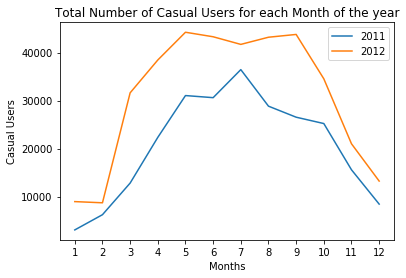

In [22]:
users_year1 = []
users_year2 = []
for year in np.unique(bike_data[:,2]):
    for month in np.unique(bike_data[:,3]):
        if year == 0:
            casual_users = bike_data[(bike_data[:,3]== month) & (bike_data[:,2]== year)][:,13].sum()
            users_year1.append(casual_users)
        elif year == 1:
            casual_users = bike_data[(bike_data[:,3]== month) & (bike_data[:,2]== year)][:,13].sum()
            users_year2.append(casual_users)

casual_users = [users_year1,users_year2]
casual_users_arr = np.array(casual_users)

plt.plot(casual_users_arr.T)
plt.title('Total Number of Casual Users for each Month of the year')
plt.ylabel('Casual Users')
plt.xlabel('Months')
plt.legend(['2011','2012'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],[1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

------
4. We will now look at the relationship between temperature and the number of users (column index 15). Your code should work out the average number of users for the following temperature ranges.

    * 1, 6
    * 6, 10
    * 10, 15
    * 15, 20
    * 20, 25
    * 25, 30
    * 30, 35
    * 35, 40

   ***Remember the temperature values specified in the file have been normalised by dividing by 41.***

Average number of Users in range (1, 6) : 51.85031847133758
Average number of Users in range (6, 10) : 73.66706302021403
Average number of Users in range (10, 15) : 123.71528588098016
Average number of Users in range (15, 20) : 168.44148199445982
Average number of Users in range (20, 25) : 209.50824261275272
Average number of Users in range (25, 30) : 234.74462365591398
Average number of Users in range (30, 35) : 330.33067729083666
Average number of Users in range (35, 40) : 317.92134831460675


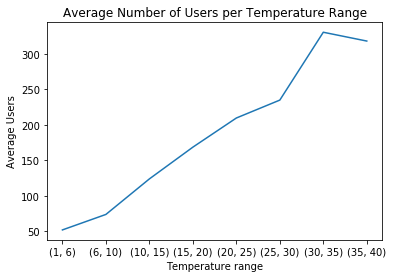

In [23]:
temp_range = {"1":(1,6), "2":(6,10), "3":(10,15), "4":(15, 20), "5":(20, 25), "6":(25, 30), "7":(30, 35), "8":(35, 40)}
avg_users_per_temp_range = []
for x, y in temp_range.items():
    avg_users = np.mean(bike_data[(bike_data[:,9]*41 >= temp_range[x][0]) \
                                                 & (bike_data[:,9]*41 < temp_range[x][1])][:,15])
    avg_users_per_temp_range.append(avg_users)
    print(f'Average number of Users in range {y} : {avg_users}')

plt.plot(avg_users_per_temp_range)
plt.title('Average Number of Users per Temperature Range')
plt.xlabel('Temperature range')
plt.ylabel('Average Users')
plt.xticks([0,1,2,3,4,5,6,7],[(1,6),(6,10),(10,15),(15, 20),(20, 25),(25, 30),(30, 35),(35, 40)])
plt.show()

---
## Question 3: Numerical Analysis Exercises Pandas - Shark Attack Dataset:
For each of the following questions you will use a dataset containing information on global shark attacks called attacks.csv.
Attribute Information:
The attributes recorded in the dataset are as follows:
0. Case Number
1. Date
2. Year
3. Type
4. Country
5. Area
6. Location
7. Activity
8. Name
9. Sex
10. Age
11. Injury
12. Fatal
13. Time
14. Species
15. Investigator or Source

You will notice in the dataset that some entries in the fatality column are recorded as UNKNOWN, n, F, etc. We ignore these entries and only consider entries that are uppercase ‘Y’ or ‘N’.
Open this file using Pandas read_csv() function. The data file is stored in a different encoding format so you can use the following line to read the data into a dataframe.

In [24]:
attacks = 'attacks.csv'
file_attacks = os.path.join(os.path.curdir,'datasets', attacks)
df = pd.read_csv(file_attacks, encoding='ISO-8859-1')

In [25]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,11-Jun-17,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,10-Jun-17,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,10-Jun-17,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,04-Jun-17,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [26]:
print(df.shape) # prints the total number of rows and columns. (Rows: 25614, Columns: 22)
print(df.columns) # prints the columns in the dataset

(25614, 22)
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')


----
1. What location globally has the highest number of shark attacks?

In [27]:
df['Location'].value_counts().head(4)

New Smyrna Beach, Volusia County    162
Daytona Beach, Volusia County        29
Melbourne Beach, Brevard County      18
Ponce Inlet, Volusia County          18
Name: Location, dtype: int64

In [28]:
print('Location with the Highest Number of Shark Attacks:', df['Location'].mode()[0])

Location with the Highest Number of Shark Attacks: New Smyrna Beach, Volusia County


----
2. Determine the six countries that have experienced the highest number of shark attacks.

In [29]:
# The six countries with the highest shark attacks
df['Country'].value_counts().head(6)

USA                 2160
AUSTRALIA           1303
SOUTH AFRICA         571
PAPUA NEW GUINEA     133
NEW ZEALAND          126
BRAZIL               103
Name: Country, dtype: int64

----
3. Modify your code to print out the six countries that have experienced the highest number of fatal shark attacks.

In [30]:
# Apart from Y and N we are told to ignore all other indicators in the fatal variable
# we would therefore use the indicator where fatal = Y since we interested in only fatal attacks
df['Fatal'].value_counts()

N          4391
Y          1566
UNKNOWN      94
 N            8
N             1
F             1
#VALUE!       1
2017          1
n             1
Name: Fatal, dtype: int64

In [31]:
# Any of the two below will give you same answer
# The six countries with the highest number of fatal shark attacks
df.loc[df['Fatal'] == 'Y', 'Country'].value_counts().head(6)
#df['Country'][df['Fatal'] == 'Y'].value_counts().head(6)

AUSTRALIA           342
USA                 250
SOUTH AFRICA        137
PAPUA NEW GUINEA     56
MEXICO               44
BRAZIL               40
Name: Country, dtype: int64

------
4. Based on the data in the Activity column are you more likely to be attacked by a shark if you are “Surfing” or “Scuba Diving”.

In [32]:
df['Activity'].value_counts()

Surfing                                 931
Swimming                                832
Fishing                                 415
Spearfishing                            325
Bathing                                 154
                                       ... 
40' fishing boat sank                     1
Boat stopped to repair electric pump      1
Fishing, casting in the surf              1
Dynamiting fish                           1
Freediving for abalone (at surface)       1
Name: Activity, Length: 1503, dtype: int64

In [33]:
df['Activity'][(df['Activity'] == 'Scuba Diving') | (df['Activity'] == 'Surfing')].value_counts(normalize=True)*100

Surfing         99.359658
Scuba Diving     0.640342
Name: Activity, dtype: float64

The likelyhood of being attacked by a shark while **Surfing is 99.35%** as compared to **0.64% while Scuba diving**, based on the data sample that contains only Surfing and Scuba Diving, hence, you are more likey to be attacked while Surfing than Scuba diving.

------
5. Determine from the dataset what percentage of all recorded shark attacks were fatal.

    *(NB: We are told to ignore all other indicators except indicators with "Y" or "N")*

In [34]:
fatal_attacks = df[df['Fatal'] == 'Y']['Fatal'].value_counts().sum()
total_attacks = df['Fatal'].value_counts().sum()

perc_of_fatal_attacks = (fatal_attacks/total_attacks) * 100
print(f'The percentage of fatal attacks: {perc_of_fatal_attacks:.2f}%')

The percentage of fatal attacks: 25.82%


------
6. For each individual country, print out the percentage of fatal shark attacks (number of fatal shark attacks expressed as a percentage of the total number of shark attacks). Some countries have recorded 0 fatal and non-fatal attacks. Your code should only consider countries where the number of non-fatal and fatal attacks are greater than 0.

In [35]:
df['Country'].value_counts()

USA                             2160
AUSTRALIA                       1303
SOUTH AFRICA                     571
PAPUA NEW GUINEA                 133
NEW ZEALAND                      126
                                ... 
ST. MAARTIN                        1
ARUBA                              1
RED SEA?                           1
EQUATORIAL GUINEA / CAMEROON       1
DJIBOUTI                           1
Name: Country, Length: 204, dtype: int64

In [36]:
for country in df['Country'].unique():
    attacks_by_country = df[(df['Fatal'] == 'Y') & (df['Country'] == country)]['Fatal'].value_counts().sum()
    total_attacks_by_country = df[df['Country'] == country]['Fatal'].value_counts().sum()
    if total_attacks_by_country > 0:
        perc_of_attacks_by_country = (attacks_by_country / total_attacks_by_country) * 100
        print(f'Percentage of Fatal Attacks in {country} : {perc_of_attacks_by_country:.2f}%')   

Percentage of Fatal Attacks in AUSTRALIA : 26.31%
Percentage of Fatal Attacks in USA : 11.60%
Percentage of Fatal Attacks in UNITED KINGDOM : 18.18%
Percentage of Fatal Attacks in BAHAMAS : 11.88%
Percentage of Fatal Attacks in UNITED ARAB EMIRATES : 0.00%
Percentage of Fatal Attacks in MEXICO : 53.01%
Percentage of Fatal Attacks in SOUTH AFRICA : 24.04%
Percentage of Fatal Attacks in REUNION : 49.15%
Percentage of Fatal Attacks in NEW ZEALAND : 22.40%
Percentage of Fatal Attacks in ST HELENA, British overseas territory : 0.00%
Percentage of Fatal Attacks in BRAZIL : 38.83%
Percentage of Fatal Attacks in INDONESIA : 66.67%
Percentage of Fatal Attacks in England : 0.00%
Percentage of Fatal Attacks in NEW CALEDONIA : 37.25%
Percentage of Fatal Attacks in SPAIN : 23.68%
Percentage of Fatal Attacks in CHINA : 50.00%
Percentage of Fatal Attacks in JAPAN : 43.75%
Percentage of Fatal Attacks in COLUMBIA : 22.22%
Percentage of Fatal Attacks in EGYPT : 36.11%
Percentage of Fatal Attacks in FREN

Percentage of Fatal Attacks in GUINEA : 100.00%
Percentage of Fatal Attacks in EQUATORIAL GUINEA / CAMEROON : 100.00%
Percentage of Fatal Attacks in COOK ISLANDS : 100.00%
Percentage of Fatal Attacks in ALGERIA : 100.00%
Percentage of Fatal Attacks in Coast of AFRICA : 100.00%
Percentage of Fatal Attacks in TASMAN SEA : 0.00%
Percentage of Fatal Attacks in GHANA : 100.00%
Percentage of Fatal Attacks in SIERRA LEONE? : 100.00%
Percentage of Fatal Attacks in GREENLAND : 100.00%
Percentage of Fatal Attacks in MEDITERRANEAN SEA : 50.00%
Percentage of Fatal Attacks in SWEDEN : 0.00%
Percentage of Fatal Attacks in Between PORTUGAL & INDIA : 100.00%
Percentage of Fatal Attacks in DJIBOUTI : 100.00%
Percentage of Fatal Attacks in BAHREIN : 100.00%
Percentage of Fatal Attacks in KOREA : 100.00%
Percentage of Fatal Attacks in RED SEA? : 0.00%
Percentage of Fatal Attacks in ASIA? : 0.00%
Percentage of Fatal Attacks in CEYLON (SRI LANKA) : 100.00%
